In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("glass.xlsx",sheet_name="glass")

In [3]:
df1 = pd.read_excel("glass.xlsx")

In [4]:
df1

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


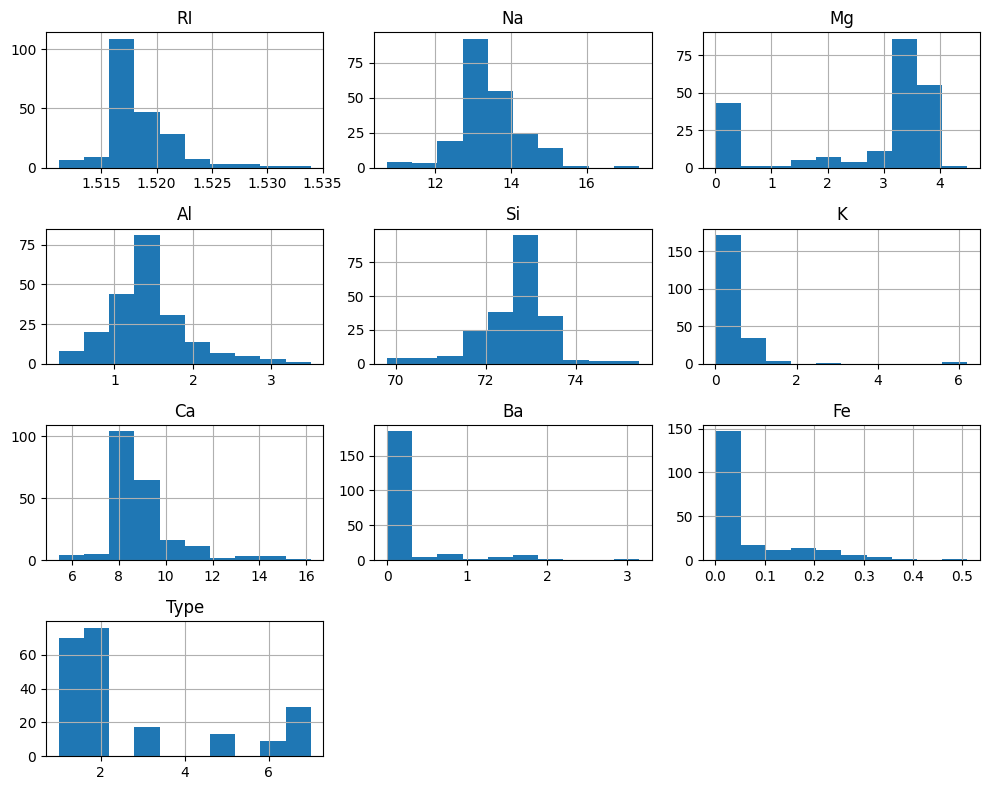

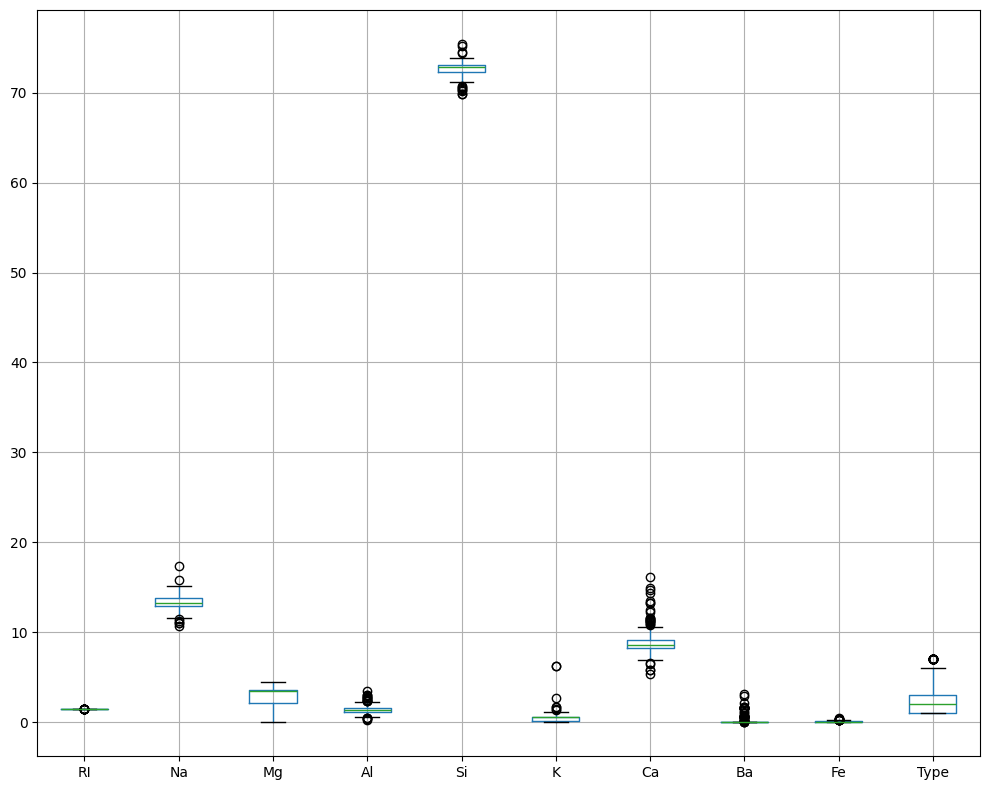

In [8]:
# Histograms for each feature
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots for each feature
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

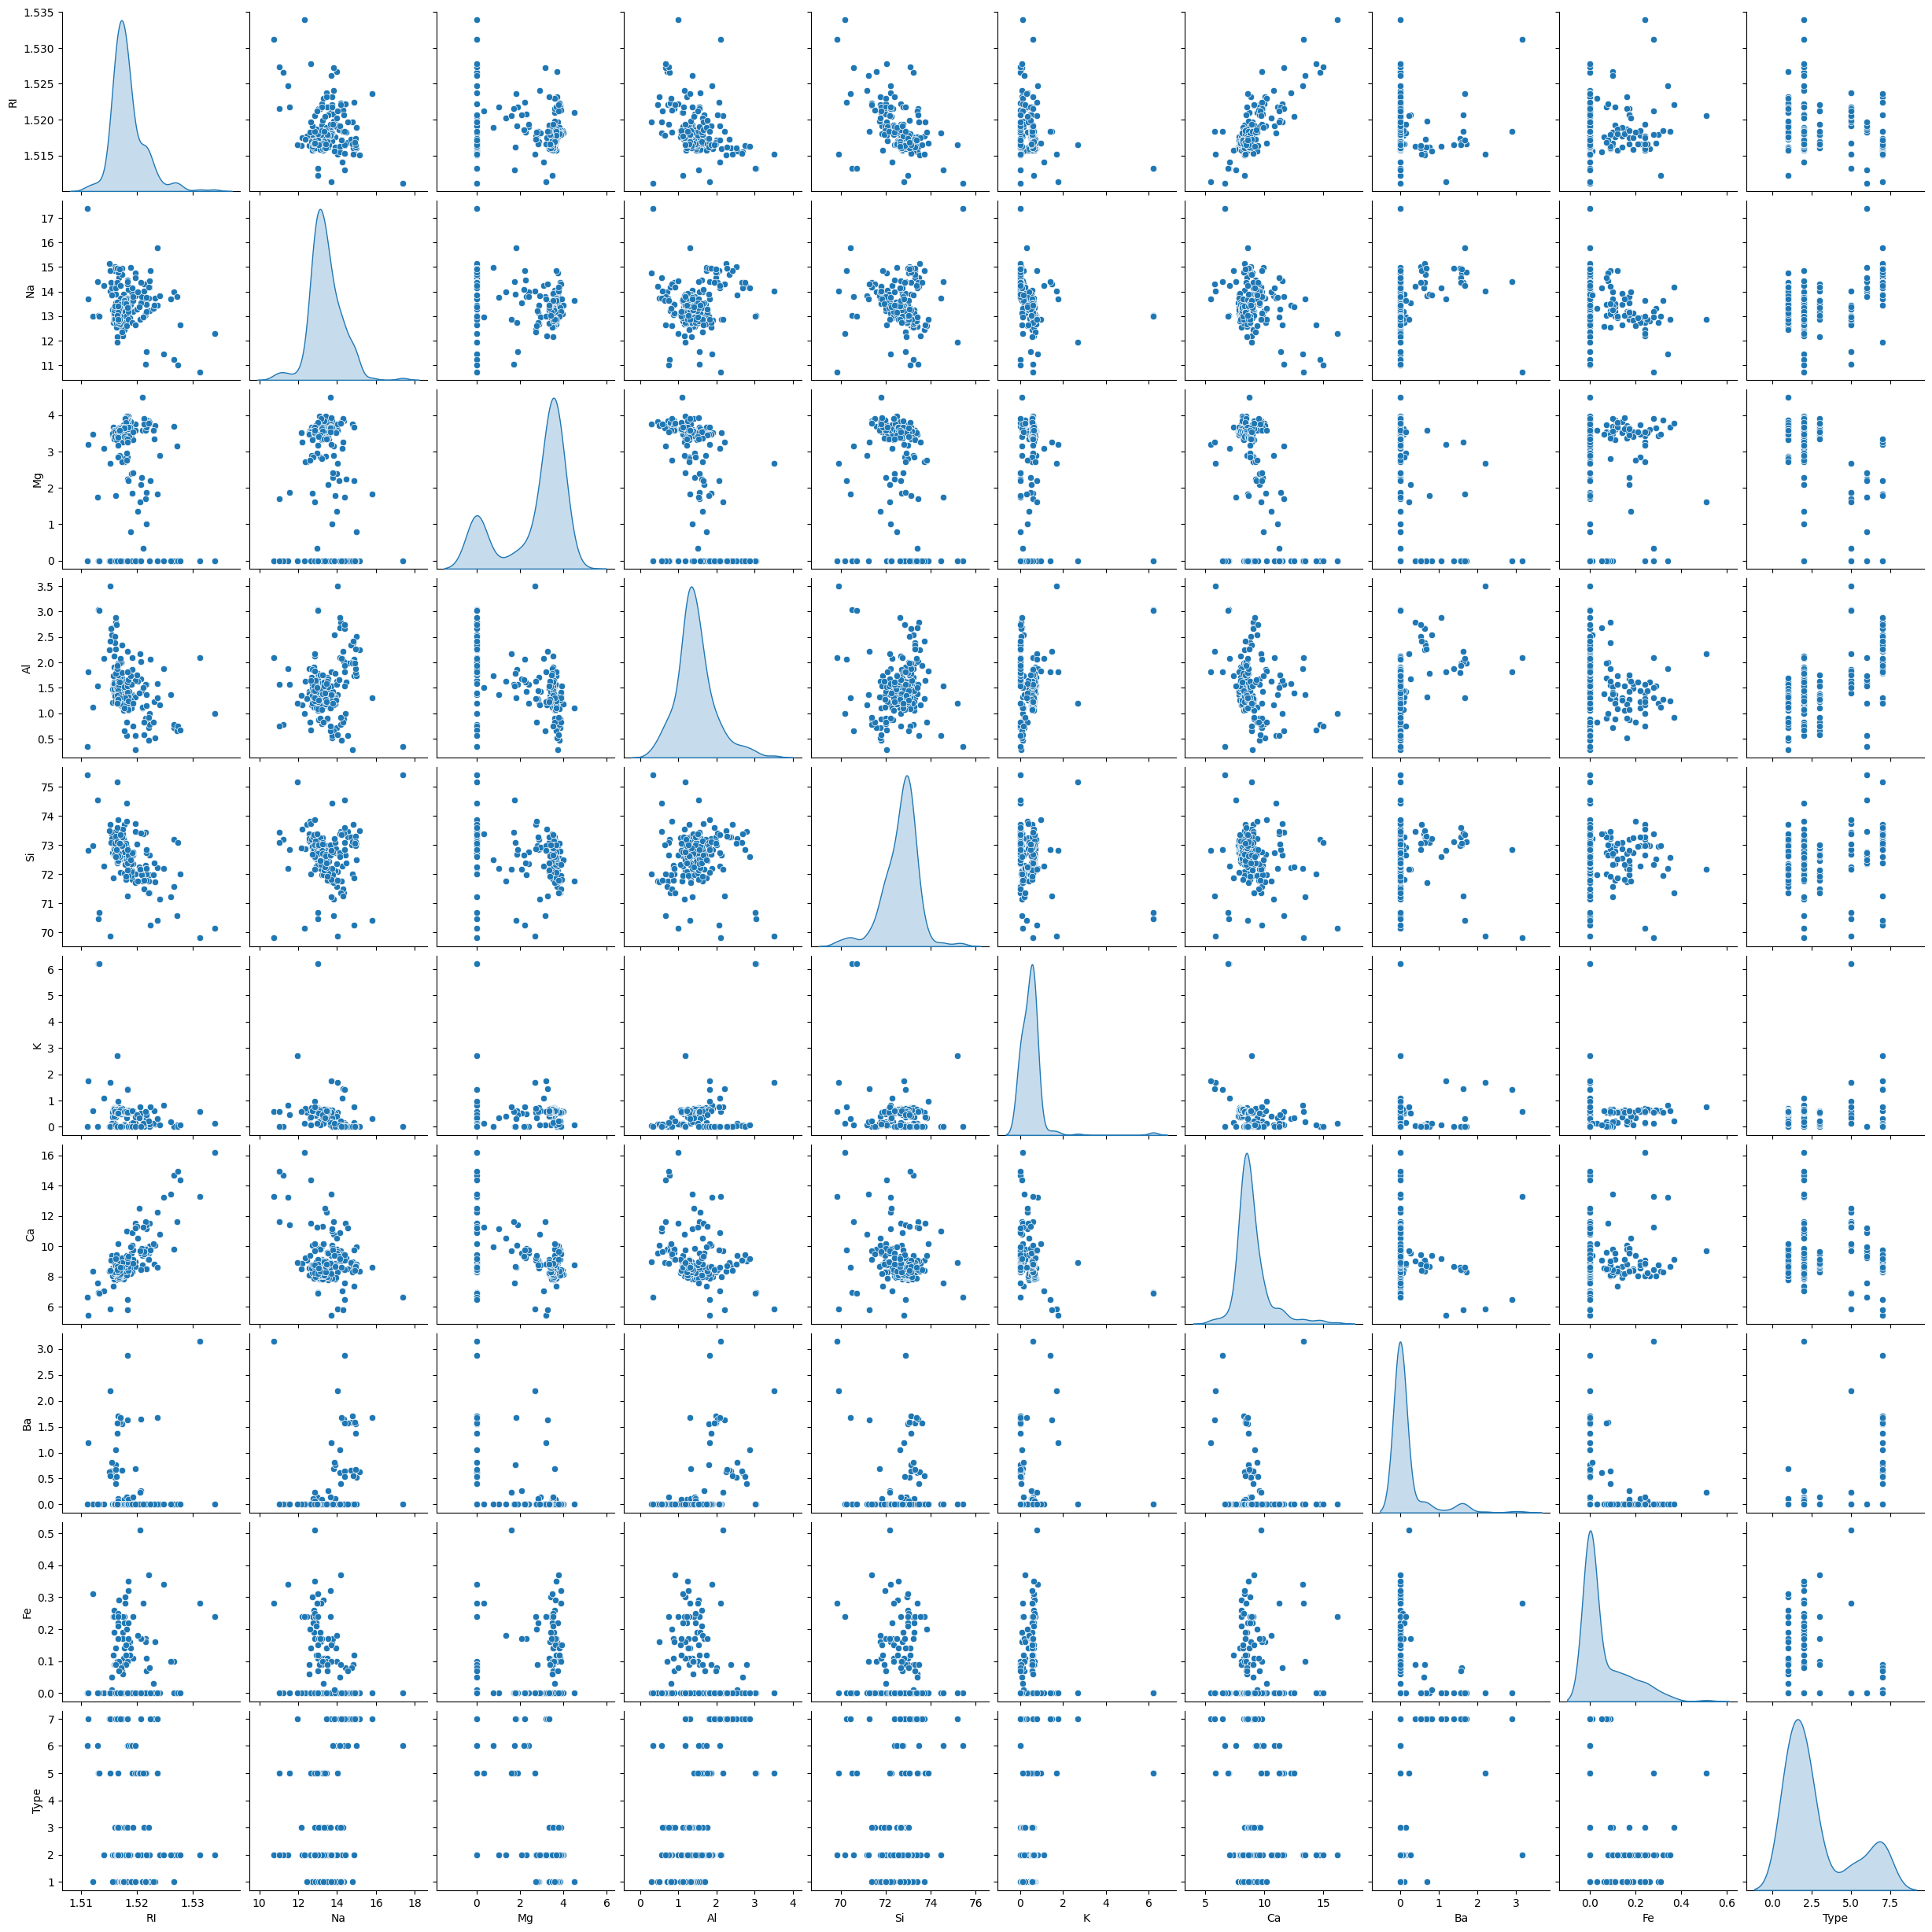

In [9]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
RI      17
Na       7
Mg       0
Al      18
Si      12
K        7
Ca      26
Ba      38
Fe      12
Type    29
dtype: int64


In [14]:
# Cap the outliers
for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

print("Outliers after capping:")
outliers_after_capping = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers_after_capping)

Outliers after capping:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


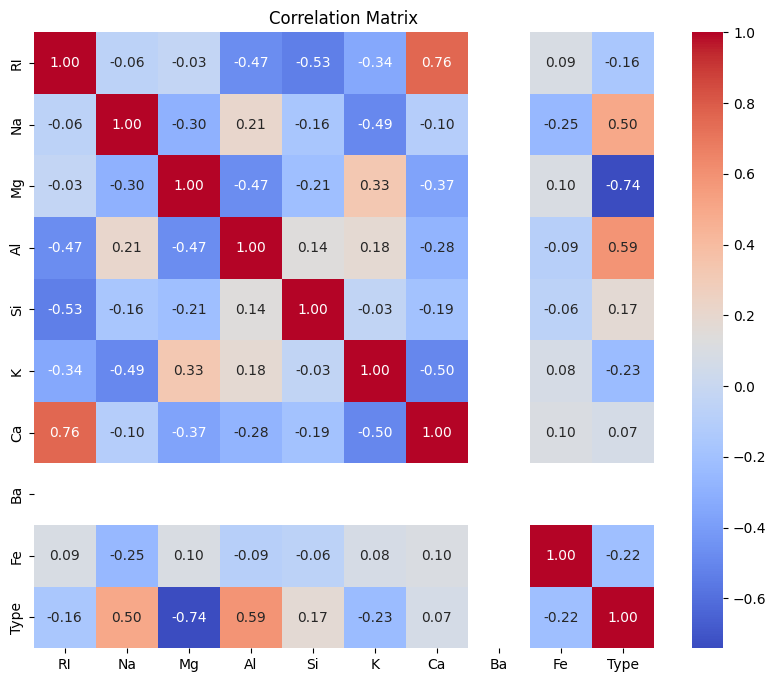

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, but good for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features:")
display(X_scaled_df.head())
print("\nTarget variable:")
display(y.head())

Scaled features:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091



Target variable:


,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of training data:")
print(X_train.shape, y_train.shape)
print("\nShape of testing data:")
print(X_test.shape, y_test.shape)

Shape of training data:
(171, 9) (171,)

Shape of testing data:
(43, 9) (43,)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [18]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest model on the test set: {accuracy:.2f}")

Accuracy of the Random Forest model on the test set: 0.81


In [19]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       0.82      0.64      0.72        14
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.50      0.67         4
         6.0       0.92      1.00      0.96        11

    accuracy                           0.81        43
   macro avg       0.88      0.76      0.79        43
weighted avg       0.84      0.81      0.81        43



# Task
Implement and train a Random Forest Classifier, Bagging Classifier, and Boosting Classifier on the training data, evaluate their performance on the test set using accuracy, precision, recall, and F1-score, and compare the results.

## Implement and train bagging classifier

### Subtask:
Use `BaggingClassifier` from scikit-learn to build and train a bagging model on the training data.


**Reasoning**:
Import BaggingClassifier, initialize and train the Bagging model using the training data.



In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

print("Bagging model trained successfully!")

Bagging model trained successfully!


## Evaluate bagging classifier

### Subtask:
Evaluate the performance of the Bagging Classifier on the test set using relevant metrics (accuracy, classification report).


**Reasoning**:
Make predictions on the test set using the trained bagging model and evaluate its performance using accuracy and a classification report.



In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate the accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of the Bagging Classifier on the test set: {accuracy_bagging:.2f}")

# Generate a classification report
report_bagging = classification_report(y_test, y_pred_bagging)
print("\nClassification Report for Bagging Classifier:")
print(report_bagging)

Accuracy of the Bagging Classifier on the test set: 0.79

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.85        11
         2.0       0.75      0.64      0.69        14
         3.0       1.00      0.33      0.50         3
         5.0       0.67      0.50      0.57         4
         6.0       0.92      1.00      0.96        11

    accuracy                           0.79        43
   macro avg       0.81      0.70      0.71        43
weighted avg       0.80      0.79      0.77        43



## Implement and train boosting classifier

### Subtask:
Use a boosting algorithm like `GradientBoostingClassifier` or `AdaBoostClassifier` from scikit-learn to build and train a boosting model on the training data.


**Reasoning**:
Import the GradientBoostingClassifier, initialize the model, and train it on the training data.



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

print("Gradient Boosting model trained successfully!")

Gradient Boosting model trained successfully!


## Evaluate boosting classifier

### Subtask:
Evaluate the performance of the Boosting Classifier on the test set using relevant metrics (accuracy, classification report).


**Reasoning**:
Evaluate the performance of the Gradient Boosting Classifier using accuracy and classification report.



In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate the accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy of the Gradient Boosting model on the test set: {accuracy_gbm:.2f}")

# Generate a classification report
report_gbm = classification_report(y_test, y_pred_gbm)
print("\nClassification Report for Gradient Boosting model:")
print(report_gbm)

Accuracy of the Gradient Boosting model on the test set: 0.91

Classification Report for Gradient Boosting model:
              precision    recall  f1-score   support

         1.0       0.85      1.00      0.92        11
         2.0       0.92      0.79      0.85        14
         3.0       1.00      1.00      1.00         3
         5.0       1.00      0.75      0.86         4
         6.0       0.92      1.00      0.96        11

    accuracy                           0.91        43
   macro avg       0.94      0.91      0.92        43
weighted avg       0.91      0.91      0.90        43



## Compare results

### Subtask:
Present a comparison of the performance metrics (accuracy, precision, recall, F1-score) from the Random Forest, Bagging, and Boosting models.


**Reasoning**:
Create a DataFrame to compare the performance metrics of the three models.



In [28]:
# Extract metrics from classification reports
report_rf_dict = classification_report(y_test, y_pred, output_dict=True)
report_bagging_dict = classification_report(y_test, y_pred_bagging, output_dict=True)
report_gbm_dict = classification_report(y_test, y_pred_gbm, output_dict=True)

# Create a dictionary to store the metrics for each model
performance_data = {
    'Model': ['Random Forest', 'Bagging', 'Gradient Boosting'],
    'Accuracy': [report_rf_dict['accuracy'], report_bagging_dict['accuracy'], report_gbm_dict['accuracy']],
    'Precision (Macro Avg)': [report_rf_dict['macro avg']['precision'], report_bagging_dict['macro avg']['precision'], report_gbm_dict['macro avg']['precision']],
    'Recall (Macro Avg)': [report_rf_dict['macro avg']['recall'], report_bagging_dict['macro avg']['recall'], report_gbm_dict['macro avg']['recall']],
    'F1-Score (Macro Avg)': [report_rf_dict['macro avg']['f1-score'], report_bagging_dict['macro avg']['f1-score'], report_gbm_dict['macro avg']['f1-score']]
}

# Create a pandas DataFrame
performance_df = pd.DataFrame(performance_data)

# Display the comparison table
display(performance_df)

,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
0,Random Forest,0.813953,0.884470,0.761905,0.791601
1,Bagging,0.790698,0.813333,0.695238,0.713282
2,Gradient Boosting,0.906977,0.935897,0.907143,0.915297


## Summary:

### Data Analysis Key Findings

*   The Bagging Classifier achieved an accuracy of 0.79 on the test set.
*   The Gradient Boosting model achieved an accuracy of 0.91 on the test set.
*   The Gradient Boosting model outperformed both Random Forest and Bagging models across all evaluated metrics (Accuracy, Precision, Recall, and F1-score), achieving an accuracy of 0.907, a macro average precision of 0.936, a macro average recall of 0.907, and a macro average F1-score of 0.915.
*   The Random Forest model had an accuracy of 0.814, while the Bagging model had an accuracy of 0.791.

### Insights or Next Steps

*   Gradient Boosting appears to be the most effective model among the three for this specific classification task based on the current evaluation metrics.
*   Further hyperparameter tuning for each model, especially the Gradient Boosting model, could potentially lead to even better performance.


Explain Bagging and Boosting methods. How is it different from each other?

Answer:

Bagging (Bootstrap Aggregating):

It trains multiple models in parallel using random subsets of the training data (with replacement).

Each model is independent, and the final output is based on majority voting (classification) or averaging (regression).

Example: Random Forest.

Goal: Reduce variance and prevent overfitting.

Boosting:

It trains models sequentially. Each new model gives more weight to the misclassified data points from previous models.

The final output is based on a weighted combination of all weak learners.

Example: AdaBoost, Gradient Boosting, XGBoost.

Goal: Reduce both bias and variance, improving accuracy.




Explain how to handle imbalance in the data.

Answer:
Imbalanced data means one class has much fewer samples than the other (e.g., fraud detection, rare disease prediction). This imbalance can bias the model toward the majority class.

Ways to handle imbalance:

Resampling techniques:

Oversampling the minority class (e.g., SMOTE – Synthetic Minority Over-sampling Technique).

Undersampling the majority class to balance the dataset.

Use different evaluation metrics:

Instead of accuracy, use Precision, Recall, F1-score, ROC-AUC to measure performance.

Use class weights:

Assign higher weights to the minority class during training so the model pays more attention to it.

Many ML libraries (like Scikit-learn, XGBoost, LightGBM) support class_weight.

Ensemble methods:

Use techniques like Balanced Random Forest or Boosting with class weights that are designed to handle imbalance.